## WEB SCRAPING --> CLEANING AND PERFORMING EDA

The goal in this example is to clean and preprocess the web scraped data. When scraping, we usually get data in a no desirable format, so we have to work with these data for transforming it to the proper format, so that we can develop a training model o make any analysis.

### IMPORTING LIBRARIES 

In [124]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
from lxml import html

The website to scrape in this exercise will be 'www.zomato.com'. We will scrape the information about best restaurants in Mumbai (a city in India). We will use the package BeautifulSoup and Chrome driver for that, so we have to specify that information before scraping.

### DEFINING THE DRIVER AND WEBSITE

In [125]:
options = webdriver.ChromeOptions()

#If we don´t want the windows to be opened while scanning, then uncomment the following line:
#options.add_argument('headless')   

#Setting the driver folder and the URL to scrape
driver = webdriver.Chrome(executable_path='C:/Users/Arantxa Fernandez/ChromeDriver/chromedriver.exe', options=options)
driver.get('https://www.zomato.com/mumbai/restaurantes-de-moda')

page_source = driver.page_source
soup        = BeautifulSoup(page_source, 'lxml')
tree        = html.fromstring(page_source)

After visiting the web and the html coding for the website; we have find some classes names that are fixed and other ones that are not. We can´t perform a scraping with a variable class name, so we have to work with the fixed ones. These classes names are specified in a list named 'class_names' below. For each one of these classes names we want to scrape all the information contained inside the class.

In this case, we will use '.get_text' instead of '.text' to retrieve the information. With this option we can specify a final character after the element retrieved, so that we can perform later an operation like 'split by that character' and clean the data in a mo 

get_text funciona mejor que .text en este caso porque nos permite introducir un caracter al final del texto del elemento.
En este caso metemos un cambio de línea, para así hacer un split por él y poder separar luego más fácil cada elemento.

### SCRAPING THE INFORMATION

In [126]:
#Scraping the information

restaurants_=[]
class_names=['sc-bke1zw-1 ixpGXU','sc-bke1zw-1 ijNBpr','sc-bke1zw-1 dFBCmH','sc-bke1zw-1 djiZfy']
for class_name in class_names:
    for rest in soup.findAll('div', {'class': class_name}):
        restaurant=[rest.get_text('\n')] 
        restaurants_.append(restaurant)
restaurants=[resta[0].replace('\n \n', '\n') for resta in restaurants_]

Let´s take a look to the information captured. It can be observed a big mess!!

In [127]:
restaurants

['Pro - Get 15% off\ncrown\nDestacado\nMH04 The Drunk Yard\n4.3\nstar-fill\nDINING\n4.1\nstar-fill\nDELIVERY\nNorth Indian\n,\xa0\nContinental\n,\xa0\nPizza\n,\xa0\nComida Rápida\n,\xa0\nChina\n,\xa0\nBebidas\nManpada, Thane West, Thane\n ',
 'Motodo Pizzeria\nNew\nstar-fill\nNuevo\nPizza\n,\xa0\nPanini\n,\xa0\nPostres\n,\xa0\nBebidas\nJio World Drive, Bandra Kurla Complex, Mumbai\n ',
 'Tip Top Grand Thali\n3.9\nstar-fill\nDINING\n4.3\nstar-fill\nDELIVERY\nGujarati\n,\xa0\nRajasthani\nHotel Tip Top Plaza, Panch Pakhadi, Thane\n ',
 'TAP\n4.1\nstar-fill\nDINING\n-\nstar-fill\nDELIVERY\nNorth Indian\n,\xa0\nChina\n,\xa0\nContinental\n,\xa0\nMexicana\n,\xa0\nItaliana\n,\xa0\nBocadillos\n,\xa0\nBebidas\nAtria Mall, Worli, Mumbai\n ',
 'Splitsvilla Bar & Lounge\n4.0\nstar-fill\nDINING\n3.5\nstar-fill\nDELIVERY\nNorth Indian\n,\xa0\nContinental\nChembur, Mumbai\n ',
 'Jeden - The Cake Expert\n4.0\nstar-fill\nDINING\n4.1\nstar-fill\nDELIVERY\nPanadería\n,\xa0\nPostres\nMarol, Mumbai\n ',
 'S

### DATA CLEANING

Now it´s time to work in cleaning data. Let´s split the data with '\xa0' character first and make some replacements in the text for cleaning.

In [5]:
#Splitting by '\xa0' character
for idx,rest in enumerate(restaurants):
    restaurants[idx]=restaurants[idx].split('\xa0-')

#Replacing commas and other punctuation characters
for item in restaurants:
    for x in range(len(item)):
         item[x]=item[x].replace('\xa0',' ').replace('(',' ').replace(')',' ') 
            
#Converting the list into a string object
for item in range(len(restaurants)):
    restaurants[item]=' '.join([elem for elem in restaurants[item]])

#Some more replacements
restaurants=[line.replace('\n \n','\n').replace('\n, \n',',').strip().split('\n') for line in restaurants]
restaurants

[['Pro - Get 15% off',
  'crown',
  'Destacado',
  'MH04 The Drunk Yard',
  '4.3',
  'star-fill',
  'DINING',
  '4.1',
  'star-fill',
  'DELIVERY',
  'North Indian,Continental,Pizza,Comida Rápida,China,Bebidas',
  'Manpada, Thane West, Thane'],
 ['Amar Juice Centre',
  '3.4',
  'star-fill',
  'DINING',
  '3.9',
  'star-fill',
  'DELIVERY',
  'Sandwich,South Indian,North Indian,China,Street Food,Comida Rápida,Postres,Bebidas',
  'Chakala, Mumbai'],
 ["MM Mithaiwala's MM Fast Food  Jalpan ",
  '3.1',
  'star-fill',
  'DINING',
  '4.1',
  'star-fill',
  'DELIVERY',
  'North Indian,South Indian,China,Street Food,Comida Rápida,Biryani,Mithai,Bebidas',
  'Malad West, Mumbai'],
 ['Kitty Su - The Lalit Mumbai',
  '3.9',
  'star-fill',
  'DINING',
  '-',
  'star-fill',
  'DELIVERY',
  'Bocadillos',
  'The Lalit Mumbai, Chakala, Mumbai'],
 ['Splitsvilla Bar & Lounge',
  '4.0',
  'star-fill',
  'DINING',
  '3.5',
  'star-fill',
  'DELIVERY',
  'North Indian,Continental',
  'Chembur, Mumbai'],
 ['

This looks better than before, but we have still some work. We need to define a table structure where we want to save our data. But the fields in each element should be the same, and now they are not. There are different lenghts or number of features for each element in our restaurant list. 

We don´t want to save fields as 'Destacado', 'offers percentage' or any other field that actually we don´t consider as relevant. We want to start from the restaurant name item. So we will remove the fields before it.

In [6]:
#Removing fields before name item

drop_words=['crown','Destacado','star-fill','DINING','DELIVERY','New','Nuevo']
restaurants = [[i for i in nested if i not in drop_words] for nested in restaurants]
restaurants = [[i for i in nested if 'Pro - Get' not in i] for nested in restaurants]
restaurants

[['MH04 The Drunk Yard',
  '4.3',
  '4.1',
  'North Indian,Continental,Pizza,Comida Rápida,China,Bebidas',
  'Manpada, Thane West, Thane'],
 ['Amar Juice Centre',
  '3.4',
  '3.9',
  'Sandwich,South Indian,North Indian,China,Street Food,Comida Rápida,Postres,Bebidas',
  'Chakala, Mumbai'],
 ["MM Mithaiwala's MM Fast Food  Jalpan ",
  '3.1',
  '4.1',
  'North Indian,South Indian,China,Street Food,Comida Rápida,Biryani,Mithai,Bebidas',
  'Malad West, Mumbai'],
 ['Kitty Su - The Lalit Mumbai',
  '3.9',
  '-',
  'Bocadillos',
  'The Lalit Mumbai, Chakala, Mumbai'],
 ['Splitsvilla Bar & Lounge',
  '4.0',
  '3.5',
  'North Indian,Continental',
  'Chembur, Mumbai'],
 ['Jeden - The Cake Expert',
  '4.0',
  '4.1',
  'Panadería,Postres',
  'Marol, Mumbai'],
 ['Smoke House Deli',
  '3.9',
  '4.0',
  'Italiana,Pasta,Hamburguesas,Ensalada,Sandwich,Comida Saludable,Jugos Naturales,Bebidas',
  'Colaba, Mumbai'],
 ["La Pino'z Pizza", '4.1', '4.0', 'Pizza,Comida Rápida', 'Sion, Mumbai'],
 ['V Lounge & 

Let´s see the elements which do not have the desirable lenght. We can see below that there is only one element in the list with a different length. There is only one element with 3 fields while the rest have 5 fields.

In [7]:
#Checking the length of the elements

[[idx, len(i)] for idx, i in enumerate(restaurants) if len(i)!=5]

[[9, 3]]

In [8]:
#The last changes: Changing the type of some variables and adding fields to shorter elements.

for item in restaurants:
    for idx, x in enumerate(item):
        if idx>0:
             item[idx]=item[idx].replace('-','0.0')
            
for item in restaurants:
    try:
        item[1]=float(item[1])
    except:
        item.insert(1, 0.0)
        
    try:
        item[2]=float(item[2])
    except:
        item.insert(2, 0.0)

In [9]:
#Now all elements have the same fields and length

[[idx, len(i)] for idx, i in enumerate(restaurants) if len(i)!=5]

[]

### DEFINING THE DATAFRAME TO SAVE THE DATA

We will define a dataframe with 5 columns as this is the number of fields we have in the list above.

In [11]:
keys=['Name','Dining rate','Delivery rate','Food style','Site']

dicty=[]
for item in restaurants:
    dicty.append(dict(zip(keys,item)))
df=pd.DataFrame(dicty)

In [12]:
#Visualizing the first rows of dataframe:

df.head()

,Name,Dining rate,Delivery rate,Food style,Site
0,MH04 The Drunk Yard,4.3,4.1,"North Indian,Continental,Pizza,Comida Rápida,C...","Manpada, Thane West, Thane"
1,Amar Juice Centre,3.4,3.9,"Sandwich,South Indian,North Indian,China,Stree...","Chakala, Mumbai"
2,MM Mithaiwala's MM Fast Food Jalpan,3.1,4.1,"North Indian,South Indian,China,Street Food,Co...","Malad West, Mumbai"
3,Kitty Su - The Lalit Mumbai,3.9,0.0,Bocadillos,"The Lalit Mumbai, Chakala, Mumbai"
4,Splitsvilla Bar & Lounge,4.0,3.5,"North Indian,Continental","Chembur, Mumbai"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           30 non-null     object 
 1   Dining rate    30 non-null     float64
 2   Delivery rate  30 non-null     float64
 3   Food style     30 non-null     object 
 4   Site           30 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.3+ KB


### LAST CHANGES BEFORE ANALYSIS

Let´s make some more little changes to our dataframe to be able to analyse the information provided by the website in a more confortable way.
For that, we will split the location field into two fields: Location and City.
Also, the Food Style field needs to be splitted into several types of variables, each one for an specific food style. We will use boolean variables to specify if a restaurant provides or not that type of food.

In [13]:
#Splitting Location field

df['Location']=df['Site'].apply(lambda x: x.split(',')[-2])
df['City']=df['Site'].apply(lambda x: x.split(',')[-1])
df=df.drop('Site', axis=1)

In [55]:
#Splitting Food Style field: First we need to know the total of unique values in the field.

unique=[]
for idx, i in enumerate(df['Food style']):
    unique2=df['Food style'][idx].split(',')
    set1=set(unique)
    set2=set(unique2)
    unique=list(set1.symmetric_difference(set2))+list(set1.intersection(set2))

print('Total number of food styles: {}'.format(len(unique)))

Total number of food styles: 40


In [49]:
#Now, let´s create a boolean variable for each type of food available in restaurants.

new_columns={}
for food in unique:
    new_columns["{0}".format(food)]=[1 if food in i else 0 for i in df['Food style']]

df_news=pd.DataFrame(new_columns)

In [56]:
df_news.head()

,Mughlai,Continental,Comida Rápida,China,Pasta,Bebidas,Gujarati,Japonesa,Panadería,Panini,...,Mediterránea,Asiática,South Indian,Biryani,Sushi,Mexicana,Europea,Sandwich,Postres,Comida Saludable
0,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Joining all this information to our initial dataset.

df=df.drop('Food style', axis=1)
df=df.join(df_news)
df.head()

,Name,Dining rate,Delivery rate,Location,City,Mughlai,Continental,Comida Rápida,China,Pasta,...,Mediterránea,Asiática,South Indian,Biryani,Sushi,Mexicana,Europea,Sandwich,Postres,Comida Saludable
0,MH04 The Drunk Yard,4.3,4.1,Thane West,Thane,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Amar Juice Centre,3.4,3.9,Chakala,Mumbai,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
2,MM Mithaiwala's MM Fast Food Jalpan,3.1,4.1,Malad West,Mumbai,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
3,Kitty Su - The Lalit Mumbai,3.9,0.0,Chakala,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Splitsvilla Bar & Lounge,4.0,3.5,Chembur,Mumbai,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### DATA ANALYSIS

Once we have the data with a proper format, we can deploy some analysis over the dataframe to know a little more about customers preferences.

We can see below that in general the rates of restaurants in Mombai are good. Only one restaurant has no rate.

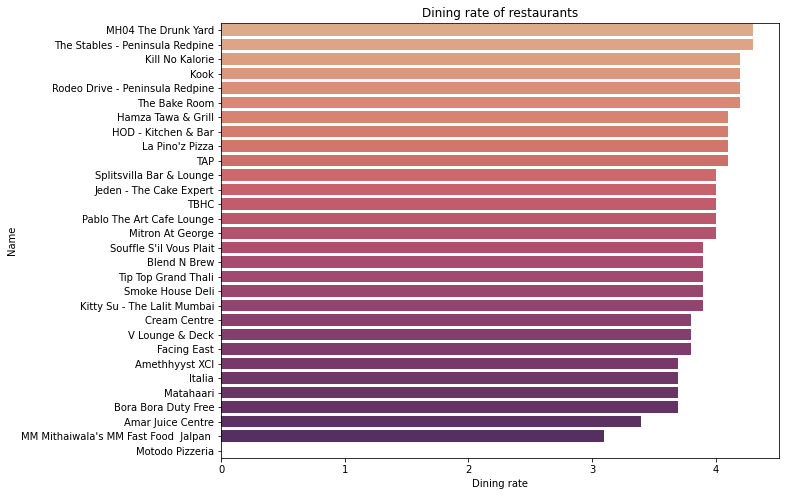

In [96]:
#Restaurants with best Dining rates:

import seaborn as sns
import matplotlib.pyplot as plt

dining_order=df[['Name','Dining rate',]].sort_values(by='Dining rate',ascending=False)

plt.figure(figsize=(10,8))
g=sns.barplot(data=dining_order, y='Name', x='Dining rate', palette='flare')
g.set_title('Dining rate of restaurants');

With respect to delivery service, there are many restaurants without a rate; perphaps they don´t offer that service of delivery or perphaps the customers have not rated them yet.

Also there are restaurants as "The Stables- Peninsula Redpine" that has high rate in dining and delivery.

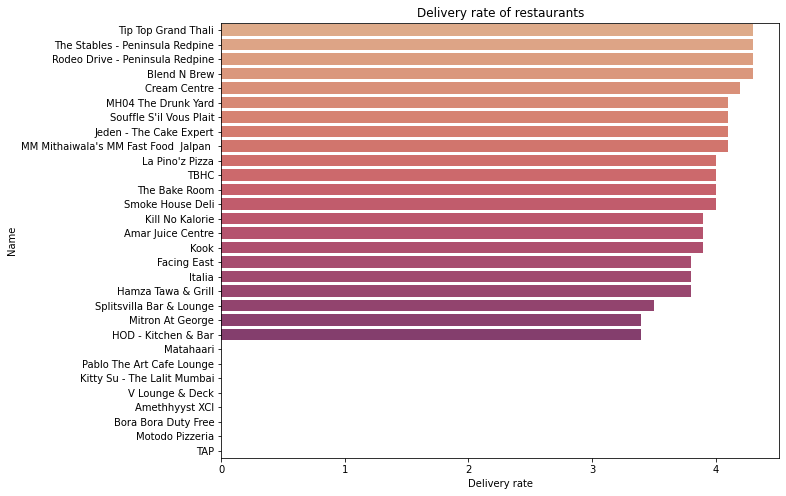

In [97]:
#Restaurants with best Delivering rates:

del_order=df[['Name','Delivery rate',]].sort_values(by='Delivery rate',ascending=False)

plt.figure(figsize=(10,8))
g=sns.barplot(data=del_order, y='Name', x='Delivery rate', palette='flare')
g.set_title('Delivery rate of restaurants');

Now, let´s check the customer preferences with respect the food type. We would find more offer if we would like to eat North Indian food, fast food or China food. 

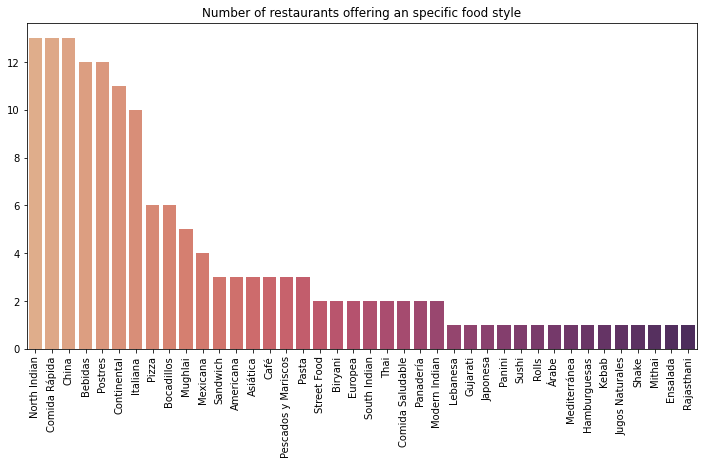

In [92]:
columns=['Mughlai','Continental', 'Comida Rápida', 'China', 'Pasta', 'Bebidas', 'Gujarati',
         'Japonesa', 'Panadería', 'Panini', 'Bocadillos', 'Rolls',
         'North Indian', 'Italiana', 'Americana', 'Modern Indian', 'Rajasthani',
         'Shake', 'Ensalada', 'Pizza', 'Thai', 'Lebanesa', 'Árabe',
         'Street Food', 'Pescados y Mariscos', 'Mithai', 'Café',
         'Jugos Naturales', 'Kebab', 'Hamburguesas', 'Mediterránea', 'Asiática',
         'South Indian', 'Biryani', 'Sushi', 'Mexicana', 'Europea', 'Sandwich',
         'Postres', 'Comida Saludable'
        ]

count_types=df[columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
g=sns.barplot(x=count_types.index, y=count_types.values, palette='flare')
g.set_title('Number of restaurants offering an specific food style')
plt.xticks(rotation=90);

Now, suppose we want to choose a restaurant and we would like to always have the possibility that the chosen one is one of the best ones for an specific type of food. We can create a custom function that outputs for us the perfect selection.

In [120]:
#Custom function to choose the best restaurant according to type food and dining rate.

def rest_selection(food_type, dining_rate):
    
    '''
    This functions takes as arguments the deserable food type and the minimun dining rate we want to consider
    to choose the best restaurants.
    
    Inputs: food_type (string indicating the type of food)
            dining_rate (float indicating the minimun rate to consider)
    Outputs:
    '''
    try:
        selected=df[(df[food_type]==1) & (df['Dining rate']>=dining_rate)].sort_values(by='Dining rate', ascending=False)
        print('The selected best restaurants are:')
        
        plt.figure(figsize=(8,5))
        g=sns.barplot(x=selected['Name'], y=selected['Dining rate'], palette='flare')
        plt.xticks(rotation=90);
        
    except:
        print('The are not restaurants for the specified arguments')
    

The selected best restaurants are:


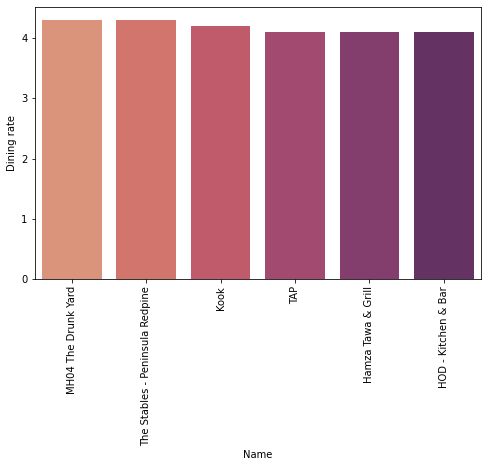

In [121]:
rest_selection('North Indian', 4.1)

The selected best restaurants are:


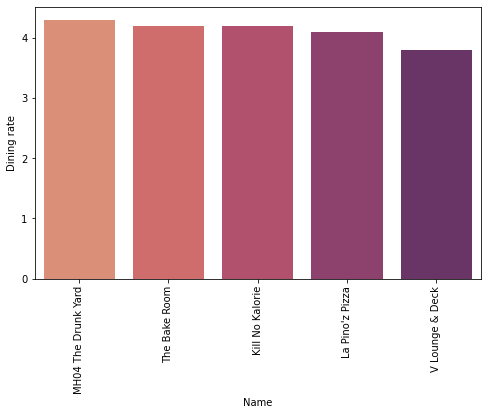

In [123]:
rest_selection('Pizza', 3.5)